![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Outlier detection: manual removal of data points
</b>
</span>

---
**Notebook version**: `1` (22 Aug 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- Flag values in time series during certain time periods as outliers
- XXX
- Flag contains `0` and `2`, whereby `0=OK` and `2=outlier`
- This example uses air temperature for one month and adds impulse noise to add some spikes to the data before testing

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings('ignore')

import diive.configs.exampledata as ed
from diive.core.plotting.timeseries import TimeSeries
from diive.pkgs.createvar.noise import add_impulse_noise
from diive.pkgs.outlierdetection.manualremoval import ManualRemoval

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.83.2


</br>

# **Docstring**

In [2]:
help(ManualRemoval)

Help on function ManualRemoval in module diive.pkgs.outlierdetection.manualremoval:

ManualRemoval(series: pandas.core.series.Series, remove_dates: list, showplot: bool = False, verbose: bool = False, idstr: str = None)
    Generate flag for data points that should be removed.



</br>

# **Load example data**

## Load and prepare data (one month)

In [3]:
df = ed.load_exampledata_parquet()
s = df['Tair_f'].copy()
s = s.loc[s.index.year == 2018].copy()
s = s.loc[s.index.month == 7].copy()
s

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.053 seconds). Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2018-07-01 00:15:00    13.014
2018-07-01 00:45:00    12.409
2018-07-01 01:15:00    12.418
2018-07-01 01:45:00    12.071
2018-07-01 02:15:00    12.182
                        ...  
2018-07-31 21:45:00    16.928
2018-07-31 22:15:00    16.276
2018-07-31 22:45:00    16.256
2018-07-31 23:15:00    15.763
2018-07-31 23:45:00    15.919
Freq: 30min, Name: Tair_f, Length: 1488, dtype: float64

</br>

# **Manual removal**

## Remove time period between two dates

In [4]:
al = ManualRemoval(
    series=s,
    remove_dates=[['2018-07-15','2018-07-20']],
    showplot=True,
    verbose=True
)

[ManualRemoval]  running ManualRemoval ...


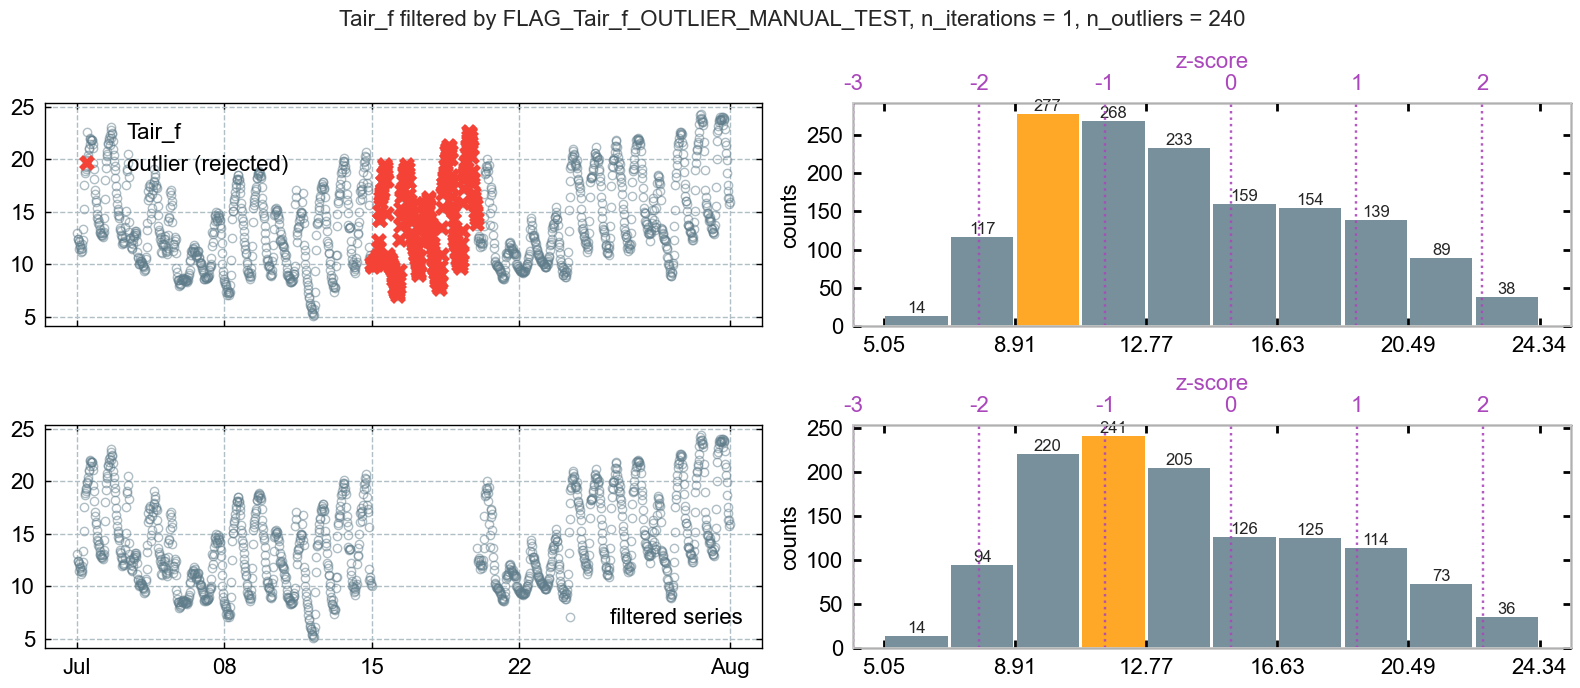

In [5]:
al.calc()

In [6]:
flag = al.get_flag()
flag

TIMESTAMP_MIDDLE
2018-07-01 00:15:00    0.0
2018-07-01 00:45:00    0.0
2018-07-01 01:15:00    0.0
2018-07-01 01:45:00    0.0
2018-07-01 02:15:00    0.0
                      ... 
2018-07-31 21:45:00    0.0
2018-07-31 22:15:00    0.0
2018-07-31 22:45:00    0.0
2018-07-31 23:15:00    0.0
2018-07-31 23:45:00    0.0
Freq: 30min, Name: FLAG_Tair_f_OUTLIER_MANUAL_TEST, Length: 1488, dtype: float64

</br>

## Remove time period between two datetimes

In [7]:
al = ManualRemoval(
    series=s,
    remove_dates=[['2018-07-05 00:45:00','2018-07-11 13:15']],
    showplot=True,
    verbose=True
)

[ManualRemoval]  running ManualRemoval ...


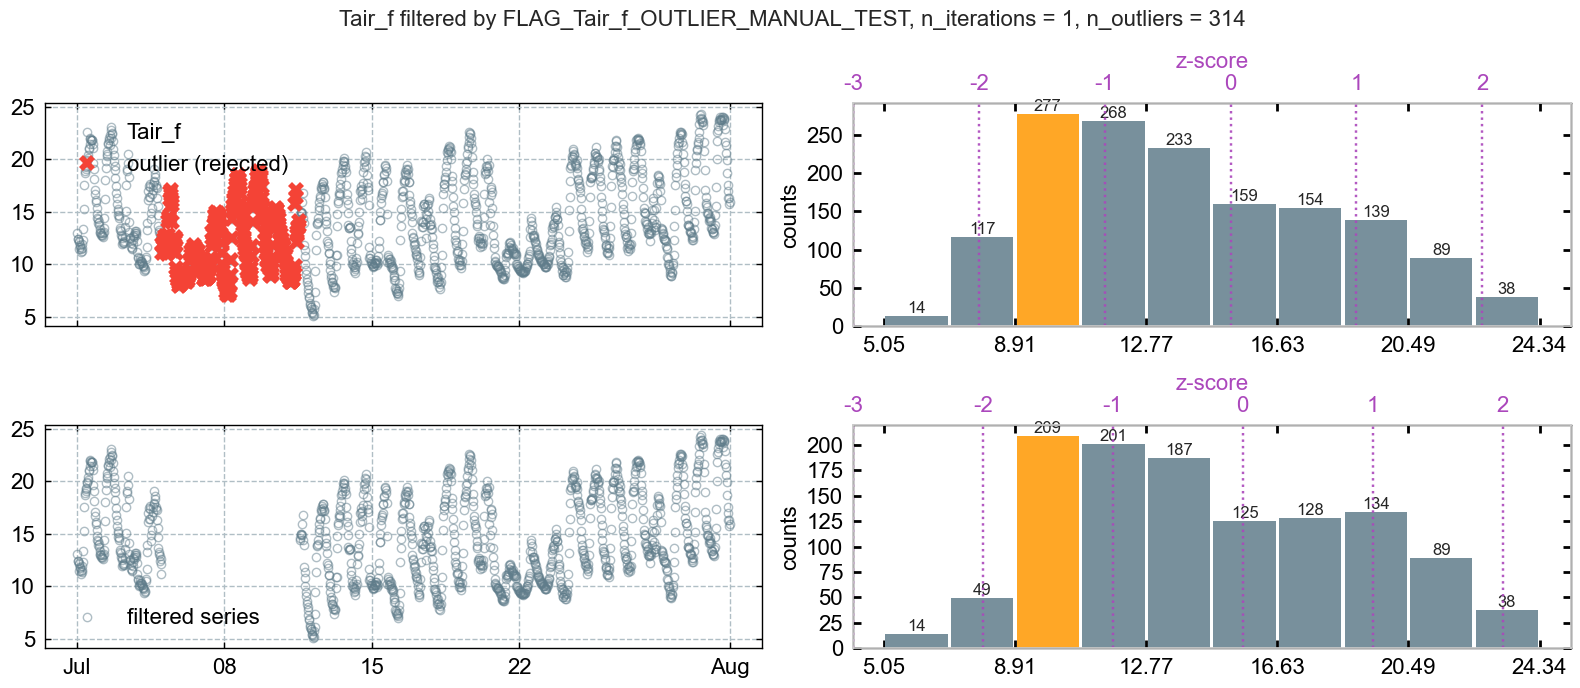

In [8]:
al.calc()

In [9]:
flag = al.get_flag()
flag

TIMESTAMP_MIDDLE
2018-07-01 00:15:00    0.0
2018-07-01 00:45:00    0.0
2018-07-01 01:15:00    0.0
2018-07-01 01:45:00    0.0
2018-07-01 02:15:00    0.0
                      ... 
2018-07-31 21:45:00    0.0
2018-07-31 22:15:00    0.0
2018-07-31 22:45:00    0.0
2018-07-31 23:15:00    0.0
2018-07-31 23:45:00    0.0
Freq: 30min, Name: FLAG_Tair_f_OUTLIER_MANUAL_TEST, Length: 1488, dtype: float64

</br>

## Remove multiple specific data points

In [10]:
al = ManualRemoval(
    series=s,
    remove_dates=[
        '2018-07-05 00:45:00',
        '2018-07-11 13:15',
        '2018-07-15 13:15',
        '2018-07-29 13:15',
    ],
    showplot=True,
    verbose=True
)

[ManualRemoval]  running ManualRemoval ...


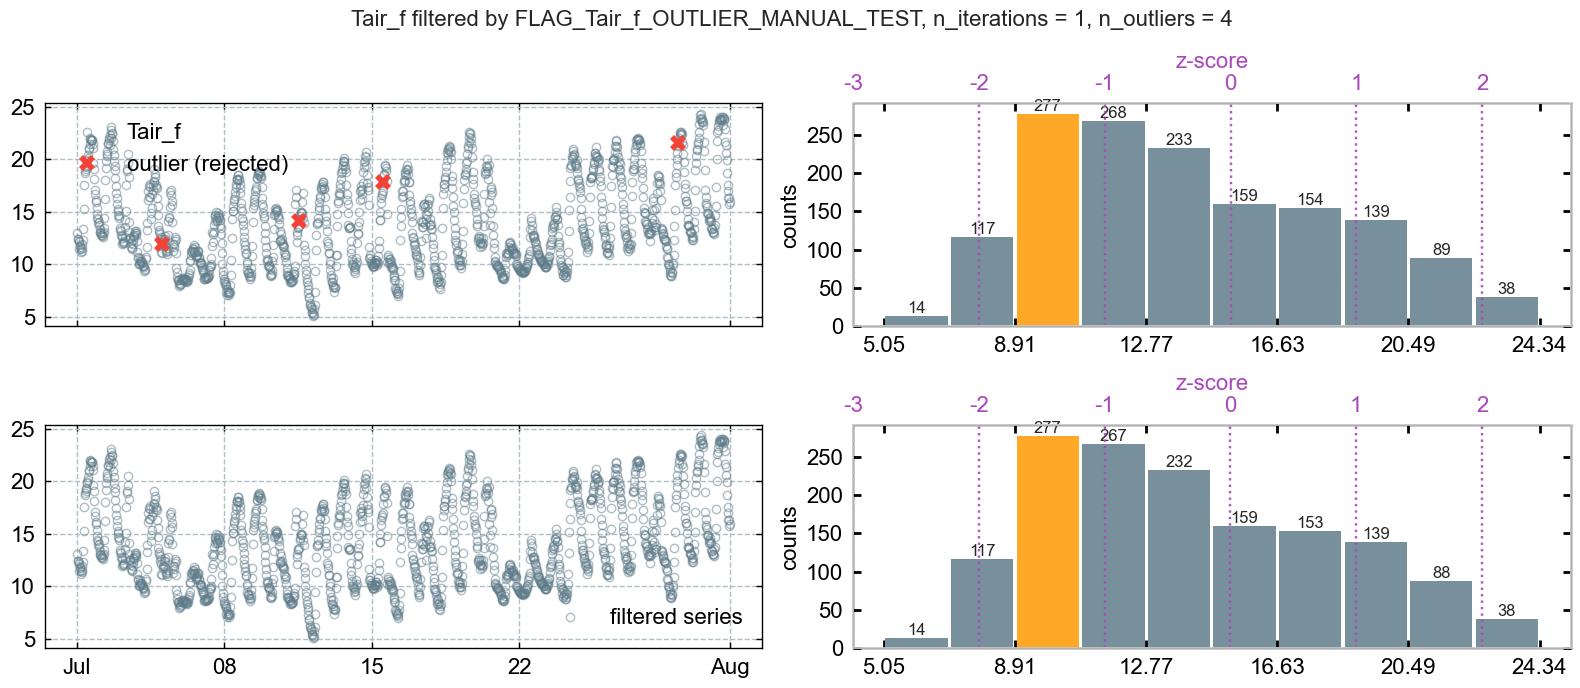

In [11]:
al.calc()

In [12]:
flag = al.get_flag()
flag

TIMESTAMP_MIDDLE
2018-07-01 00:15:00    0.0
2018-07-01 00:45:00    0.0
2018-07-01 01:15:00    0.0
2018-07-01 01:45:00    0.0
2018-07-01 02:15:00    0.0
                      ... 
2018-07-31 21:45:00    0.0
2018-07-31 22:15:00    0.0
2018-07-31 22:45:00    0.0
2018-07-31 23:15:00    0.0
2018-07-31 23:45:00    0.0
Freq: 30min, Name: FLAG_Tair_f_OUTLIER_MANUAL_TEST, Length: 1488, dtype: float64

</br>

## Remove time periods and specific data points

In [13]:
al = ManualRemoval(
    series=s,
    remove_dates=[
        ['2018-07-05 00:45:00', '2018-07-11 13:15'],
        ['2018-07-15', '2018-07-17'],
        ['2018-07-21', '2018-07-24'],
        '2018-07-29 13:15',
        '2018-07-31 00:15',
    ],
    showplot=True,
    verbose=True
)

[ManualRemoval]  running ManualRemoval ...


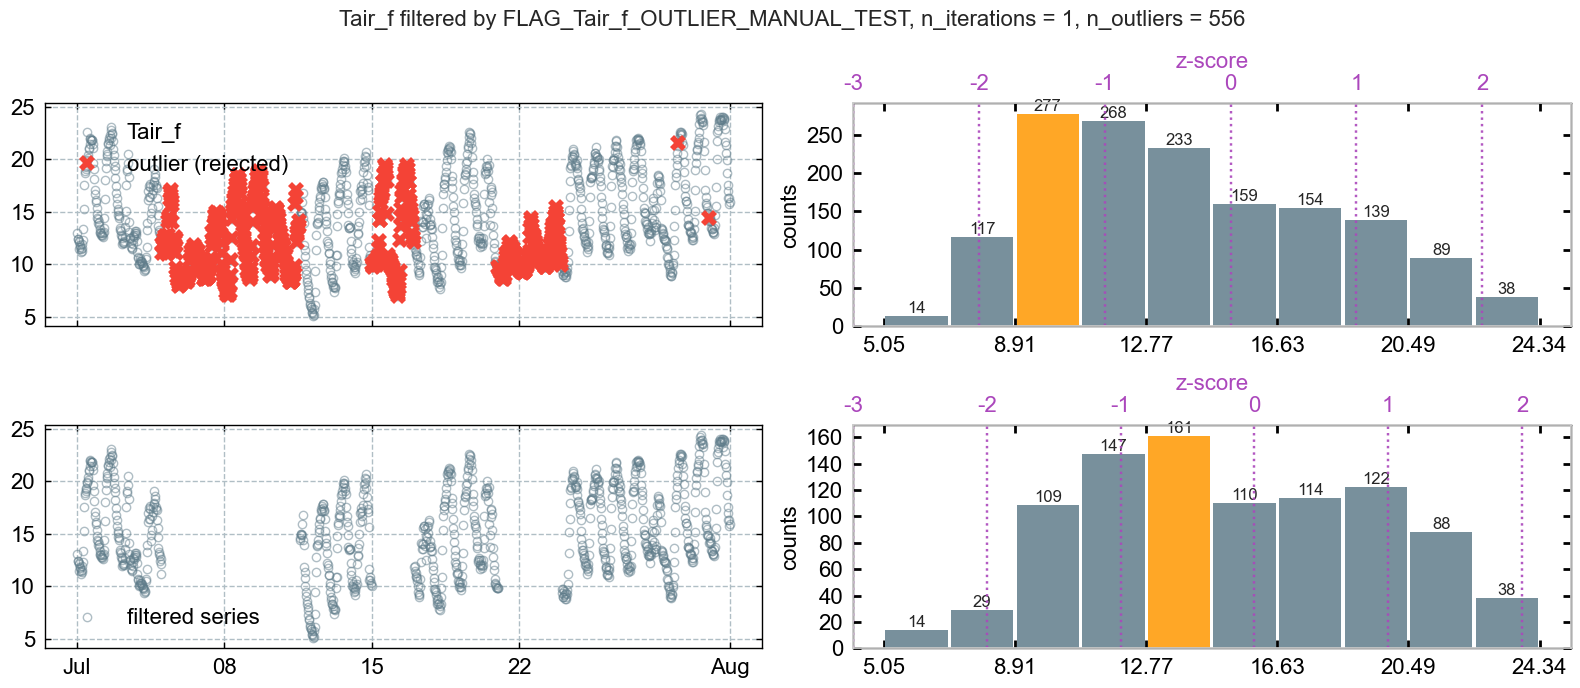

In [14]:
al.calc()

In [15]:
flag = al.get_flag()
flag

TIMESTAMP_MIDDLE
2018-07-01 00:15:00    0.0
2018-07-01 00:45:00    0.0
2018-07-01 01:15:00    0.0
2018-07-01 01:45:00    0.0
2018-07-01 02:15:00    0.0
                      ... 
2018-07-31 21:45:00    0.0
2018-07-31 22:15:00    0.0
2018-07-31 22:45:00    0.0
2018-07-31 23:15:00    0.0
2018-07-31 23:45:00    0.0
Freq: 30min, Name: FLAG_Tair_f_OUTLIER_MANUAL_TEST, Length: 1488, dtype: float64

</br>

# End of notebook

In [16]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-10-25 00:11:36
